We decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we  decided to try to attract investors. 
We will prepare some market research and present in this notebook. We have open-source data on restaurants in LA for that purpose.


# Step 1. Download the data and prepare it for analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

data = pd.read_csv('/datasets/rest_data_us.csv')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [3]:
data = data.dropna().reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 7 columns):
index          9648 non-null int64
id             9648 non-null int64
object_name    9648 non-null object
address        9648 non-null object
chain          9648 non-null object
object_type    9648 non-null object
number         9648 non-null int64
dtypes: int64(3), object(4)
memory usage: 527.8+ KB


**Result: Noticed there were Nan value rows, decided to drop those rows as we figured it may affect our research. Lucky for us, there were 3 such rows among over 9000 records, so that wouldnt really affect our research having dropped the records.**

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Great, we have the data loaded and prepared. Good job.
</div>
</font>

# Step 2. Data analysis


    1.Investigate the proportions of the various types of establishments. Plot a graph.
    2.Investigate the proportions of chain and nonchain establishments. Plot a graph.
    3.Which type of establishment is typically a chain?
    4.What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
    5.Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
    6.Put the data on street names from the address column in a separate column.
    7.Plot a graph of the top ten streets by number of restaurants.
    8.Find the number of streets that only have one restaurant.
    9.For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
    10.Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

## 1.Investigate the proportions of the various types of establishments. Plot a graph.

             object_type
object_type             
Bakery               283
Bar                  292
Cafe                 435
Fast Food           1066
Pizza                319
Restaurant          7253
['_classic_test', 'seaborn-darkgrid', 'seaborn-muted', 'seaborn-white', 'tableau-colorblind10', 'seaborn-whitegrid', 'bmh', 'seaborn-colorblind', 'dark_background', 'seaborn-ticks', 'seaborn-bright', 'fivethirtyeight', 'seaborn-talk', 'seaborn-deep', 'Solarize_Light2', 'classic', 'seaborn-dark-palette', 'ggplot', 'seaborn-dark', 'fast', 'grayscale', 'seaborn-pastel', 'seaborn', 'seaborn-notebook', 'seaborn-paper', 'seaborn-poster']


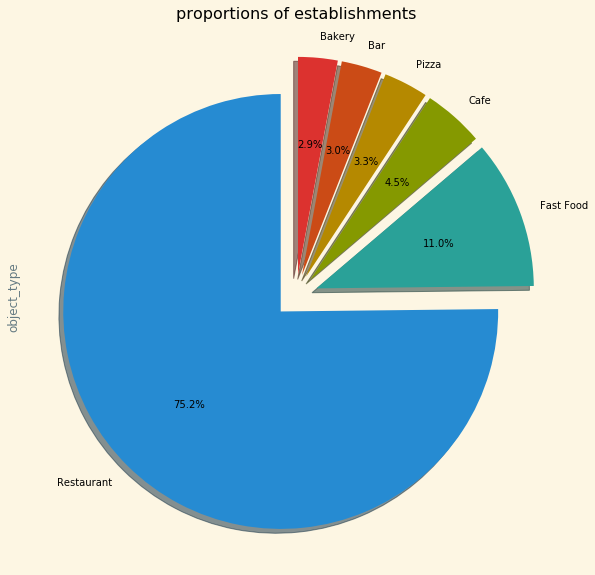

In [4]:
group=(data.groupby('object_type').agg({'object_type': 'count'}))
print(group)
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
plt.style.use('Solarize_Light2')
x=(data['object_type'].value_counts()).plot(kind='pie', figsize=(10,10), title='proportions of establishments', explode=explode, \
                                            autopct='%1.1f%%', shadow=True, startangle=90)
print(plt.style.available)



**Result: Seems like 75.2% of all establishments are Restaurants, second largest establishment type is Fast Food at 11%, and 3rd largest establishment is Cafe at 4.5% .**

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Agree. Nice visualization, good.
</div>
</font>

## 2.Investigate the proportions of chain and nonchain establishments. Plot a graph. 

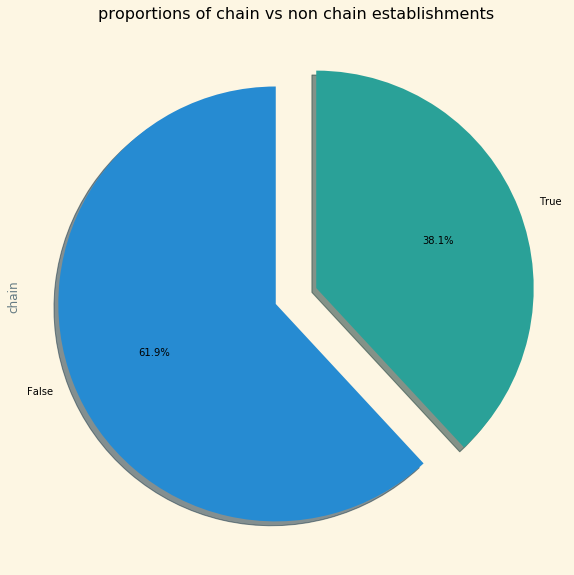

In [4]:
explode = (0.1,0.1)
plt.style.use('Solarize_Light2')
x=(data['chain'].value_counts()).plot(kind='pie', figsize=(10,10), title='proportions of chain vs non chain establishments', explode=explode, \
                                            autopct='%3.1f%%', shadow=True, startangle=90)

**Result: 61.9% of all establishments are Not Chain establishments, 38.1% are chain establishments. Seems like mom and pops businesses dominate the food and drinks industry.**

## 3.Which type of establishment is typically a chain?

In [5]:
#fig = px.bar(data, x='object_type', y='number',color='chain', title='type of establishment a chain')
#fig.update_xaxes(tickangle=45)
#fig.show()
data2=data
#sns.jointplot(x="object_type", y="object_type", data=data2, kind='reg', color='blue')
data3=data[['chain','object_type']]
a=data.groupby(['object_type','chain'])['chain'].count()
display(a)
#data[['chain','object_type']].corr()

object_type  chain
Bakery       True      283
Bar          False     215
             True       77
Cafe         False     169
             True      266
Fast Food    False     461
             True      605
Pizza        False     166
             True      153
Restaurant   False    4961
             True     2292
Name: chain, dtype: int64

**Result: Bakery is typically a chain establishment with 100% of all establishments being a chain, Chain establishments that are Cafes are over 65% more than Non Chain ones. Seems like we are doing right choice to compete against non chain cafes.**

In [6]:
"""
#Cool bonus, please ignore
chain = data[data['chain']==True]
fig= plt.figure()


display(chain.groupby('object_type')['number'].sum().sort_values(ascending=False).plot(kind='bar',color='purple', alpha=0.3, \
                    title='seats by establishment chain/nonchain',label='Chain'))
nonchain = data[data['chain']==False]
display(nonchain.groupby('object_type')['number'].sum().sort_values(ascending=False).plot(kind='bar',color='orange', \
                                                                                          label='Non-Chain', alpha=0.5))
plt.legend()

result=(nonchain.groupby('object_type')['number'].sum()-chain.groupby('object_type')['number'].sum())
display(result)
display(result.sum())"""


"\n#Cool bonus, please ignore\nchain = data[data['chain']==True]\nfig= plt.figure()\n\n\ndisplay(chain.groupby('object_type')['number'].sum().sort_values(ascending=False).plot(kind='bar',color='purple', alpha=0.3,                     title='seats by establishment chain/nonchain',label='Chain'))\nnonchain = data[data['chain']==False]\ndisplay(nonchain.groupby('object_type')['number'].sum().sort_values(ascending=False).plot(kind='bar',color='orange',                                                                                           label='Non-Chain', alpha=0.5))\nplt.legend()\n\nresult=(nonchain.groupby('object_type')['number'].sum()-chain.groupby('object_type')['number'].sum())\ndisplay(result)\ndisplay(result.sum())"

## 4.What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

,object_type,number,proportion
object_type,,,
Bakery,283,6162,21.773852
Bar,77,3100,40.259740
Cafe,266,6894,25.917293
Fast Food,605,23044,38.089256
Pizza,153,3906,25.529412
Restaurant,2292,102810,44.856021


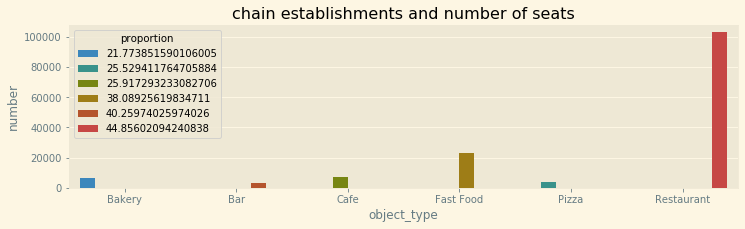

In [5]:
chain = data[data['chain'] == True]
#chain.groupby('object_type')['number'].sum().sort_values(ascending=False)
z=chain.groupby('object_type').agg({'object_type': 'count', 'number': 'sum'})
z['proportion']=z['number']/z['object_type']
display(z)
plt.figure(figsize=(12, 3)) # Note! Write this code before you create the graph
ax = sns.barplot(x=z.index, y="number", hue="proportion",  data=z).set_title('chain establishments and number of seats')


**Result: On average it appears that chain establishments are many and the number of seats vary between 21 seats at a Bakery to 44 seats at a restaurant on average. To be totally sure that we are not wrong we can compare to a nonchain establishments in the graph below.**

,object_type,number,proportion
object_type,,,
Bar,215,9972,46.381395
Cafe,169,3981,23.556213
Fast Food,461,10895,23.633406
Pizza,166,5200,31.325301
Restaurant,4961,245688,49.523886


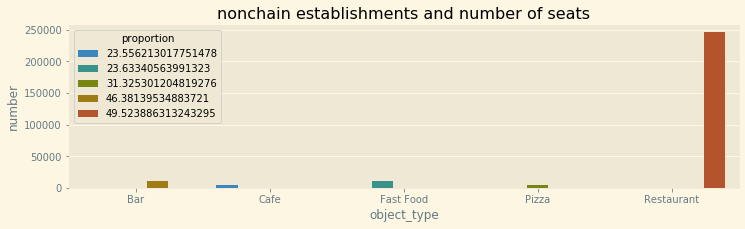

In [6]:
chain = data[data['chain'] == False]
#chain.groupby('object_type')['number'].sum().sort_values(ascending=False)
q=chain.groupby('object_type').agg({'object_type': 'count', 'number': 'sum'})
q['proportion']=q['number']/q['object_type']
display(q)
plt.figure(figsize=(12, 3)) # Note! Write this code before you create the graph
ax = sns.barplot(x=q.index, y="number", hue="proportion",  data=q).set_title('nonchain establishments and number of seats')


**Result: as we see there are far more number of establishments and more seats at non chain establishments with Restaurants dominating the chart. In our data chart above the graph we see that number of establishments also outweights chain establishments in both number and average number of chairs**

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Fast food differs most of all.
</div>
</font>

## 5.Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [9]:
"""
#bonus code please ignore
data2=data
plt.style.use('classic')
sns.stripplot(x="object_type", y="number", data=data2,hue='chain').set_title("Chain/Non Chain Establishments by number of seats")
b=data.groupby(['chain'])['number'].mean()
display(b)"""

"""**Result: It appears that chains have less seats compared to Non-chain establsihments. We see that Chain establishments on average have 40 seats, non chain ones have 46, not whole a lot of difference at first glance. It is understandable that chain has less seats because as we see in the graph most establishments are blue for seats meaning non chain establishments have more seats than chain establishments.** """

'**Result: It appears that chains have less seats compared to Non-chain establsihments. We see that Chain establishments on average have 40 seats, non chain ones have 46, not whole a lot of difference at first glance. It is understandable that chain has less seats because as we see in the graph most establishments are blue for seats meaning non chain establishments have more seats than chain establishments.** '

,object_type,number
object_type,,
Restaurant,7253,48.048807
Bar,292,44.767123
Fast Food,1066,31.837711
Pizza,319,28.545455
Cafe,435,25.000000
Bakery,283,21.773852


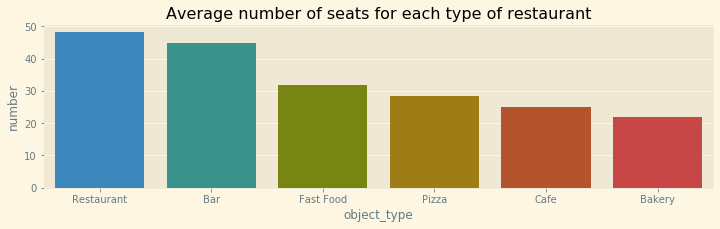

In [7]:
#restaurants = data[data['object_type']=='Restaurant']
w=data.groupby('object_type').agg({'object_type': 'count', 'number': 'mean'}).sort_values(by='number',ascending=False)
display(w)

plt.figure(figsize=(12, 3)) # Note! Write this code before you create the graph
ax = sns.barplot(x=w.index, y='number',  data=w).set_title('Average number of seats for each type of restaurant')


**Result:On average Restaurants have 48 seats, Bars have 44 seats, Fast foods 31 seats, Pizza 28 seats, Cafes 25 seats, Bakeries 22 seats. On average, Restaurants have the highest number of seats at 48 seats**

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
👍
</div>
</font>

## 6.Put the data on street names from the address column in a separate column.

In [11]:
data.head()

,index,id,object_name,address,chain,object_type,number
0,0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [12]:
#data['street']=data['address'].str.split(n=1).str[1]#.rstrip('#')#.tolist()
#data['street']=data['street'].str.rstrip('#')
#data
#female_name.rstrip(')')

In [13]:
data['street'] = data['address'].apply(lambda x: x.split(' ', 1)[1])
data['street'] = data['street'].str.replace('#[ \w\-%]+', '')
data['street'] = data['street'].str.replace('STE[ \w\-%]+', '')
data['street'] = data['street'].str.replace('SUITE[ \w\-%]+', '')
data['street'] = data['street'].str.replace('UNIT[ \w\-%]+', '')
data['street'] = data['street'].str.strip()
data

,index,id,object_name,address,chain,object_type,number,street
0,0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...,...
9643,9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9644,9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9645,9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9646,9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST


**Result: We saved values in the street column stripping from leading bld number, and anything that had #,ste,suite,unit in the address**

## 7.Plot a graph of the top ten streets by number of restaurants.

,street,object_name
0,WILSHIRE BLVD,370
1,W SUNSET BLVD,355
2,W PICO BLVD,337
3,S WE,268
4,SANTA MONICA BLVD,257
5,HOLLYWOOD BLVD,238
6,W OLYMPIC BLVD,226
7,S FIGUEROA ST,219
8,W 3RD ST,215
9,S VERMONT AVE,208


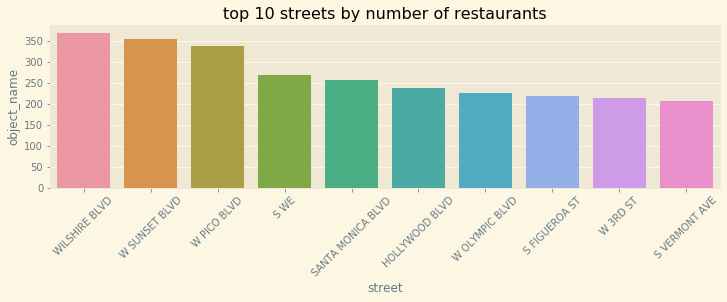

In [14]:
plt.figure(figsize=(12, 3)) # Note! Write this code before you create the graph
top_streets=data.groupby('street')['object_name'].count().sort_values(ascending=False).reset_index().head(10)

ax = sns.barplot(data=top_streets,x='street',y='object_name').set_title('top 10 streets by number of restaurants')

plt.xticks(rotation=45)
display(top_streets)



**Result: Our top 10 streets are shown above with the graph. Top street with highest number of restaurants are located on Wilshire Blvd with 370 establishments, then W Sunsent BLVD with 355 establishments, and top 3rd one is W PICO BLVD with 337 establishments**

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Uh, 350 restaurants per a street. What a busy area it should be.
</div>
</font>

## 8.Find the number of streets that only have one restaurant.


In [15]:
low_streets=data.groupby('street')['object_name'].count().sort_values(ascending=False).reset_index()
low_streets=low_streets[low_streets['object_name']==1].reset_index()
print(low_streets['street'].nunique(),'streets that only have one restaurant.')

595 streets that only have one restaurant.


**Result: 595 streets have only 1 restaurant**

## 9.For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?


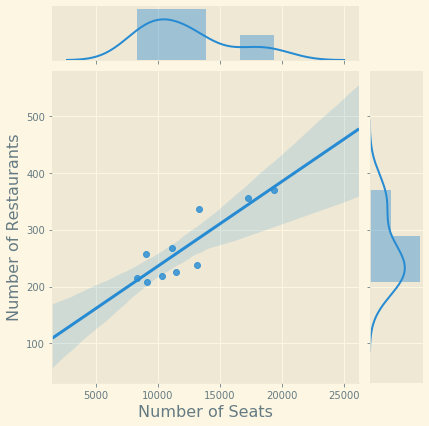

In [16]:
distribution_top_streets = data[data['street'].isin(top_streets['street'])].reset_index()
distribution_top_streets = distribution_top_streets.groupby(['street']).agg({'object_type':'count', 'number':'sum'}).reset_index()
g=sns.jointplot(x='number', y='object_type', data=distribution_top_streets, kind='reg')
#ax.set(xlabel="Number of Restaurants", ylabel = "Number of seats")
#set_axis_labels(xlabel="Number of Restaurants", ylabel = "Number of seats")
g.set_axis_labels("Number of Seats", "Number of Restaurants", fontsize=16)

**Result: In the graph above we researched top 10 streets with highest number of restaurants heading to up to 20,000 seats on a street of nearly 400 restaurants. As expected we see an upward trend, the more number of restaurants on a street, the higher number of streets.** 

_--Those streets could set the Guiness record if they played Musical Chairs game :)_

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Looks convincingly. Especially about Musical Chairs game 🙂
</div>
</font>

## 10.Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

**Result: We do not recommend opening chain in busy streets because it seems like people like to sit down and spend time there. We draw such conclusion because restaurants that are non chain have more seats than chain ones. Bakery, Cafe, and Fast food would do better than non chain establishments because non chain establishments do not use as many chairs. Restaurant establishments on average can compete with non chain establishments because number of seats is not disproportionally different. Everything else is not advisable to open on busy streets for chain establishments**

# Conclusion

75.2% of all establishments are Restaurants, second largest establishment type is Fast Food at 11%, and 3rd largest establishment is Cafe at 4.5%.

61.9% of all establishments are Not Chain establishments, 38.1% are chain establishments. Seems like mom and pops businesses dominate the food and drinks industry.

On average it appears that chain establishments are many and the number of seats vary between 21 seats at a Bakery to 44 seats at a restaurant on average. To be totally sure we see there are far more number of establishments and more seats at non chain establishments with Restaurants dominating the chart. 

In our data chart above the graph we see that number of establishments also outweights chain establishments in both number and average number of chairs

It appears that chains have less seats compared to Non-chain establsihments. 
We see that Chain establishments on average have 40 seats, non chain ones have 46, not whole a lot of difference at first glance. 
It is understandable that chain has less seats because as we see in the graph most establishments are blue for seats meaning non chain establishments have more seats than chain establishments.

On average Restaurants have 48 seats, Bars have 44 seats, Fast foods 31 seats, Pizza 28 seats, Cafes 25 seats, Bakeries 22 seats. 
On average, Restaurants have the highest number of seats at 48 seats

Top street with highest number of restaurants are located on Wilshire Blvd with 370 establishments, then W Sunsent BLVD with 355 establishments, and top 3rd one is W PICO BLVD with 337 establishments

595 streets have only 1 restaurant

top 10 streets with highest number of restaurants heading to up to 20,000 seats on a street of nearly 400 restaurants. 
As expected we see an upward trend, the more number of restaurants on a street, the higher number of streets.

We do not recommend opening chain in busy streets because it seems like people like to sit down and spend time there. 
We draw such conclusion because restaurants that are non chain have more seats than chain ones. Definetely Bakery would be best with dominating number of seats compared to non chain establishments having no presence, second would be Bars (as they have more seats on average than non establishment), and Fast food would do better than non chain establishments,
because non chain establishments do not use as many chairs.

Restaurant establishments on average can compete with non chain establishments because number of seats is not disproportionally different. Everything else is not advisable to open on busy streets for chain establishments.

Opening a small robot cafe on a busy street in LA would be better idea if you are doing a chain one as chained cafes have more seats and that would be a factor against any competing non chain cafe establishment on a busy street since non chain cafes have less seats, and on average establishments on busy streets have more seats (more power to us with more seats even if it is a small cafe). 

<font color='Green'> 
### <u>REVIEWER SUMMARY</u>
<br/>
<div class="alert alert-block alert-success">
OK, you have done a great job 👏. You demonstrate confident knowledge and skills. I am happy to accept your project.<br/>
I wish you all the best in the learning and next career. Good luck! 👋
</div>
<div class="alert alert-block alert-warning">
It would be good style to design your code according to industrial standards. You can find more information here:<br/>

<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>
</div>
</font>